In [1]:
import cv2
import numpy as np
from IPython.display import Image

In [2]:
# 사용할 모델.
model_name = 'opencv_data/res10_300x300_ssd_iter_140000.caffemodel'

# 모델 내의 신경망 구조 정보 파일명.
prototxt_name = 'opencv_data/deploy.prototxt.txt'

# 얼굴이라고 인정할 최소 정확도.
min_confidence = 0.141

# 사용할 파일명.
file_name = 'opencv_data/image/marathon_01.jpg'

# 이미지 읽기.
img = cv2.imread(file_name)
# cv2.imshow('Original Image', img)

# 원본 이미지의 가로 세로 길이.
height, width = img.shape[0:2]

# 얼굴 인식 작업.
# 사용할 모델 불러오기.
model = cv2.dnn.readNetFromCaffe(prototxt_name, model_name)

# prototxt 파일 이미지가 300 X 300, 3채널로 설정되어 있으므로 이에 맞춰 변환.
cvt = cv2.resize(img, (300, 300))
# cv2.imshow('Cvt', cvt)

# 2진 데이터로 변환.
# 원본 이미지 데이터, 스케일링(크기 조정), 결과 데이터 행렬 사이즈, 표준화를 위해 각 생상에서 빼줄 색상값.
blob = cv2.dnn.blobFromImage(cvt, 1, (300,300), (104, 177, 123))
# print(blob)

# 학습 모델에 데이터를 입력.
model.setInput(blob)

# 얼굴 부분 인식.
detection = model.forward()
# Index[2] : 200 이 부분이 얼굴로 인식된 부분, 즉 200 군데가 얼굴로 인식된 것을 의미.
# print(detection.shape)

# 얼굴이라고 인식된 부분의 개수만큼 반복.
for i in range(0, detection.shape[2]):
    confidence = detection[0, 0, i, 2]
    # 각 영역의 얼굴이라고 판단한 예측 정확도 확률.
    # print(confidence)
    
    # 설정한 최소 정확도 보다 높은 것만 이용.
    if confidence > min_confidence :
    
        # 얼굴이라고 인식된 영역의 데이터를 추출.
        box1 = detection[0, 0, i, 3:7]
        # print(box1)

        # 원본 이미지에 맞게 좌표를 계산.
        box2 = box1*np.array([width, height]*2)
        # print(box2)

        # 좌표를 정수(int) 형태로 변환.
        x1, y1, x2, y2 = box2.astype('int')
        # print(x1, y1, x2, y2)

        # 사각형 생성.
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 0, 255), 2)

        # 예측 정확도 표시.
        text = f'{int(confidence*100)}%'
        cv2.putText(img, text, (x1, y1), cv2.FONT_HERSHEY_SCRIPT_SIMPLEX, 0.5, (0, 0, 255), 1)

cv2.imshow('Detection', img)
cv2.waitKey()
cv2.destroyAllWindows()

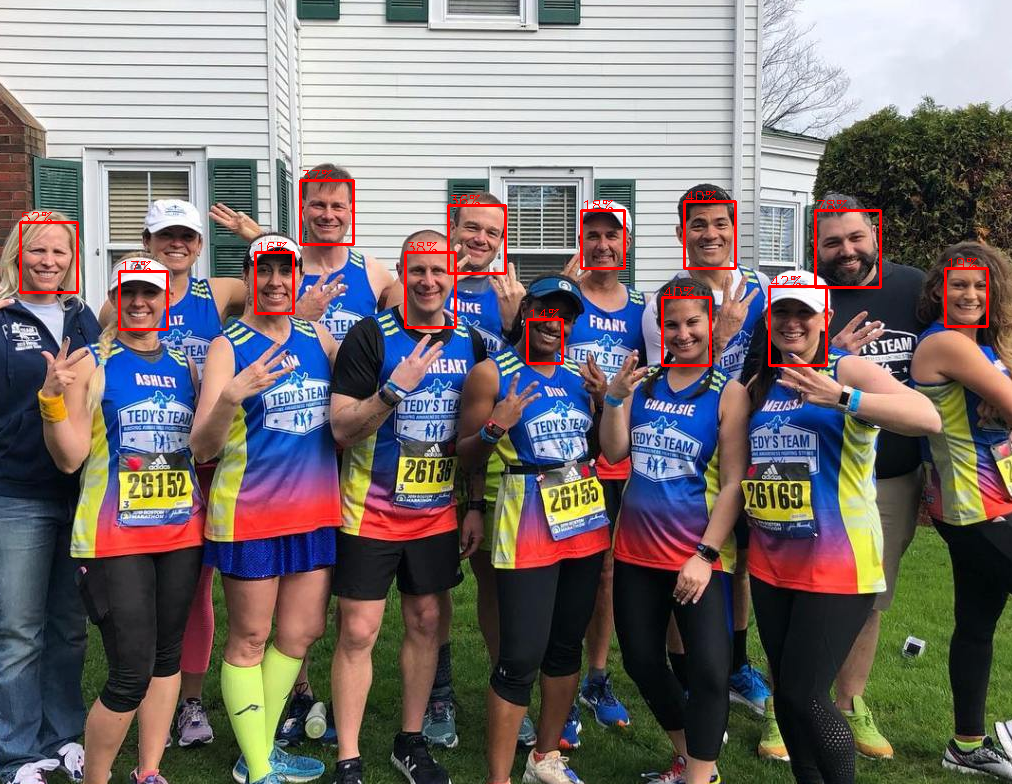

In [3]:
Image('opencv_image/capcher1.PNG')

In [4]:
# 사용할 파일명.
file = 'opencv_data/video/obama_01.mp4'

# 얼굴이라고 인정할 최소 정확도.
min_confidence = 0.5

# 영상 재생.
cap = cv2.VideoCapture(file)

while True :
    ret, Frame = cap.read()
    if Frame is None :
        break
        
    cvt = cv2.resize(Frame,(300, 300))
    blob = cv2.dnn.blobFromImage(cvt, 1, (300,300), (104, 177, 123))
    model.setInput(blob)
    detection = model.forward()
    
    for i in range(0, detection.shape[2]):
        
        confidence = detection[0,0,i,2]
        if confidence > min_confidence :
            Height, Width = Frame.shape[0:2]
            Box1 = detection[0,0,i,3:7]
            Box2 = Box1*np.array([Width, Height]*2)
            x1, y1, x2, y2 = Box2.astype('int')  
            cv2.rectangle(Frame, (x1, y1), (x2, y2), (0, 0, 255), 2)
            text = f'{int(confidence*100)}%'
            cv2.putText(Frame, text, (x1, y1), cv2.FONT_HERSHEY_SCRIPT_SIMPLEX, 0.5, (0, 0, 255), 1)

    cv2.imshow('Test', Frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q') :
        break

cv2.destroyAllWindows()

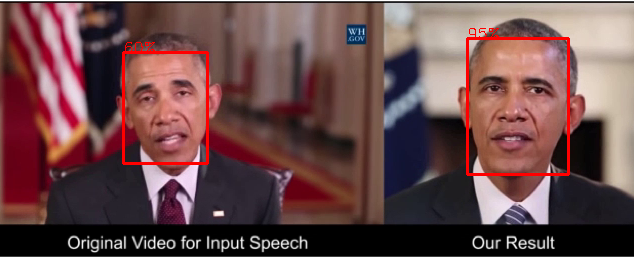

In [5]:
Image('opencv_image/capture.PNG')